# análisis exploratorio del conjunto de datos "superstore"

para este caso solo se hace el análisis exploratorio con la finalidad de explorar las herramientas de visualización de datos que posee python

In [41]:
# importar la librería xlrd al entorno de trabajo  "pip install xlrd"

import pandas as pd

ruta_archivo=r"superstore.xls"
datos_superstore=pd.read_excel(ruta_archivo,sheet_name='Orders')

datos_superstore.describe()


,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


Esta base de datos es una recopilación sobre la información de ventas de una tienda de Estados Unidos

de esta base de datos se tiene que visualizar lo siguiente: 

¿Cuál es la categoría de productos más vendida?

¿Quién es el cliente que compra más?

¿En qué Trimestre (Q) se realizan más ventas?

In [42]:
print(datos_superstore.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [43]:
categoría_mas_vendida = datos_superstore.groupby('Category')['Quantity'].sum().reset_index()# el reset index restablecer el índice de un DataFrame convierte los valores agrupados en índices
print(categoría_mas_vendida)

          Category  Quantity
0        Furniture      8028
1  Office Supplies     22906
2       Technology      6939


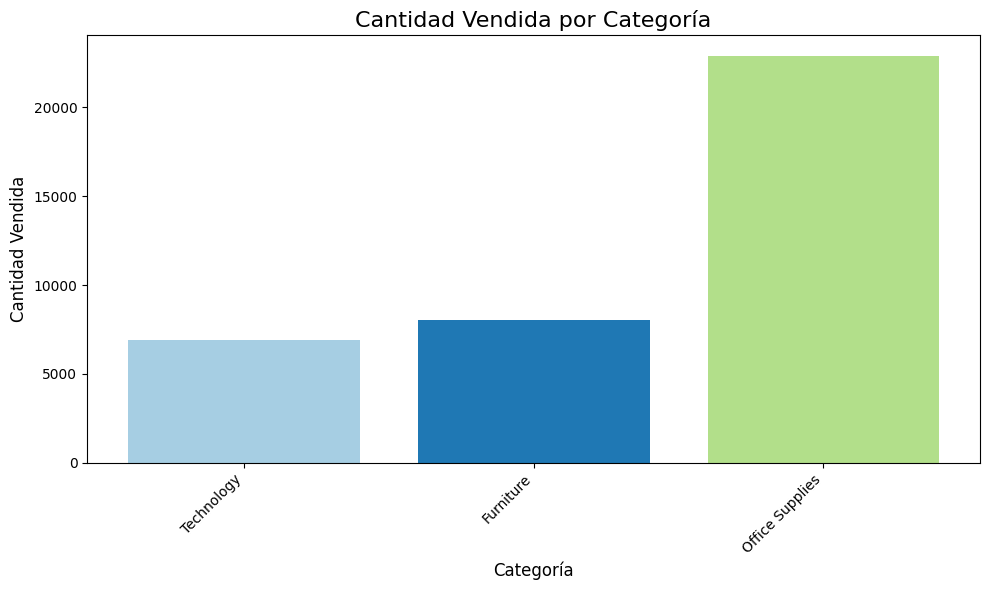

In [44]:
categoría_mas_vendida=categoría_mas_vendida.sort_values(by='Quantity',ascending=True)

import matplotlib.pyplot as plt

# Definir una lista de colores (puedes personalizarla)
colores = plt.cm.Paired(range(len(categoría_mas_vendida)))

plt.figure(figsize=(10, 6))
plt.bar(categoría_mas_vendida['Category'], categoría_mas_vendida['Quantity'], color=colores)

# Mostrar los ejes
plt.title('Cantidad Vendida por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mejor visibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()


# ¿Quién es el cliente que compra más?

In [45]:
compras_por_cliente = datos_superstore.groupby('Customer Name')['Sales'].sum().reset_index()

clientes_superan_5000 = compras_por_cliente[compras_por_cliente['Sales'] > 10000]

clientes_superan_5000 = clientes_superan_5000.sort_values(by='Sales', ascending=True)

print(clientes_superan_5000)

          Customer Name      Sales
249        Edward Hooks  10310.880
90         Bill Shonely  10501.653
417      Karen Ferguson  10604.266
486       Maria Etezadi  10663.728
169         Clay Ludtke  10880.546
132     Caroline Jumper  11164.974
689         Seth Vernon  11470.950
75         Becky Martin  11789.630
312           Greg Tran  11820.120
756        Todd Sumrall  11891.751
156  Christopher Conant  12129.072
672        Sanjit Engle  12209.438
334        Hunter Lopez  12873.298
671        Sanjit Chand  14142.334
441        Ken Lonsdale  14175.229
6         Adrian Barton  14473.571
757        Tom Ashbrook  14595.620
622        Raymond Buch  15117.339
730        Tamara Chand  19052.218
686         Sean Miller  25043.050


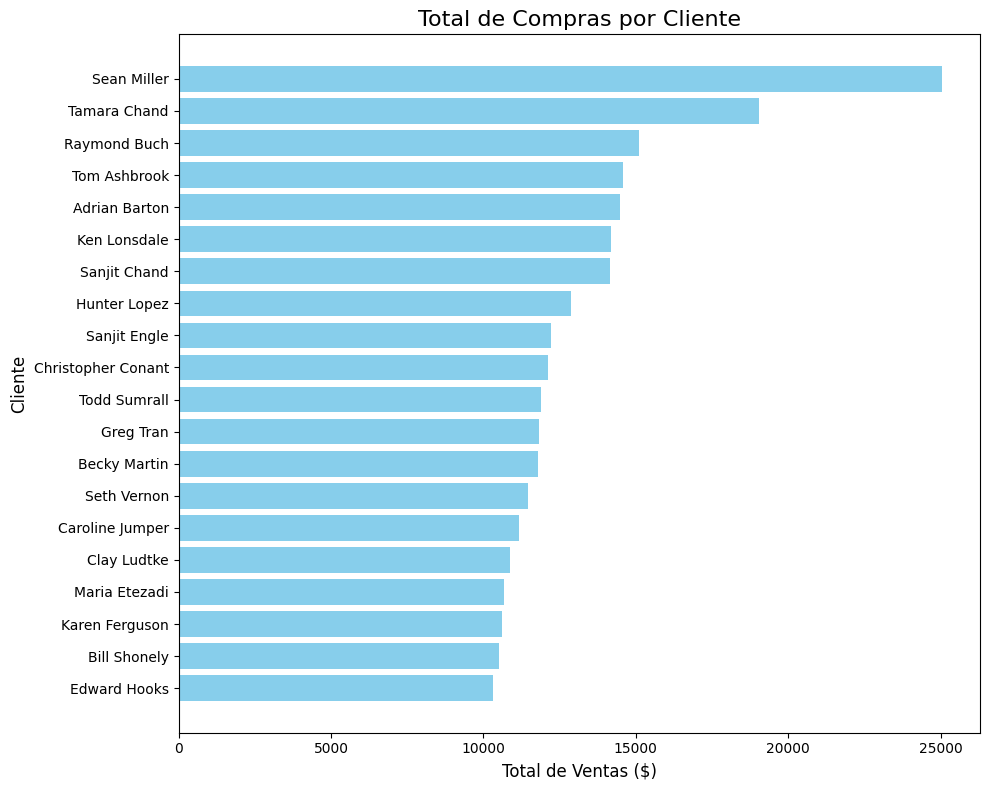

In [46]:
# Crear el histograma horizontal
plt.figure(figsize=(10, 8))
plt.barh(clientes_superan_5000['Customer Name'], clientes_superan_5000['Sales'], color='skyblue')

# Añadir títulos y etiquetas
plt.title('Total de Compras por Cliente', fontsize=16)
plt.xlabel('Total de Ventas ($)', fontsize=12)
plt.ylabel('Cliente', fontsize=12)

# Ajustar el espaciado para una mejor visualización
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# ¿En qué Trimestre (Q) se realizan más ventas?

In [47]:
print(datos_superstore.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [48]:
#creando una nueva columna para el trimestre
datos_superstore['Trimestre'] = datos_superstore['Order Date'].dt.quarter # añade la columna de los trimestres

ventas_por_trimestre = datos_superstore.groupby('Trimestre')['Sales'].sum().reset_index()

ventas_por_trimestre = ventas_por_trimestre.sort_values(by='Sales', ascending=True)

print(ventas_por_trimestre)

   Trimestre        Sales
0          1  359681.5758
1          2  445509.6196
2          3  613932.1057
3          4  878077.5592


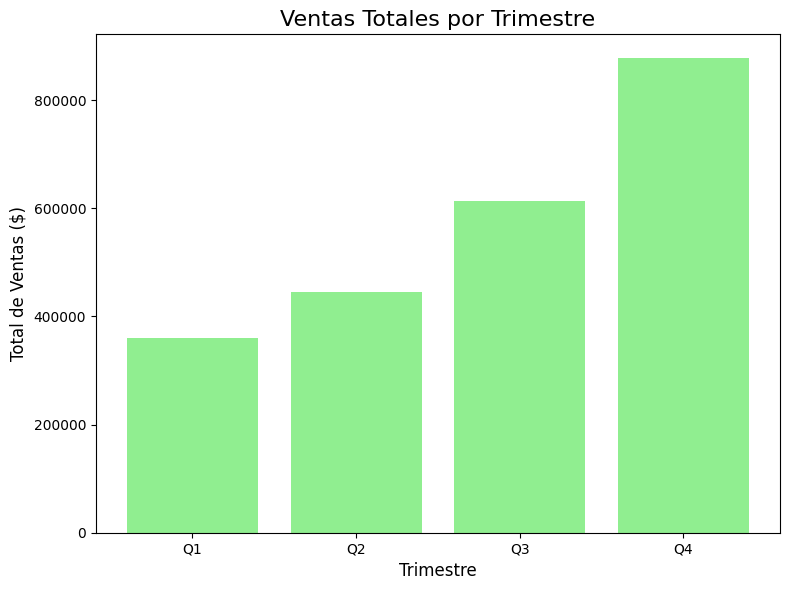

In [49]:
plt.figure(figsize=(8, 6))
plt.bar(ventas_por_trimestre['Trimestre'], ventas_por_trimestre['Sales'], color='lightgreen')

# Añadir títulos y etiquetas
plt.title('Ventas Totales por Trimestre', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Total de Ventas ($)', fontsize=12)
plt.xticks(ticks=[1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])  # Etiquetas en el eje x

# Mostrar la gráfica
plt.tight_layout()
plt.show()

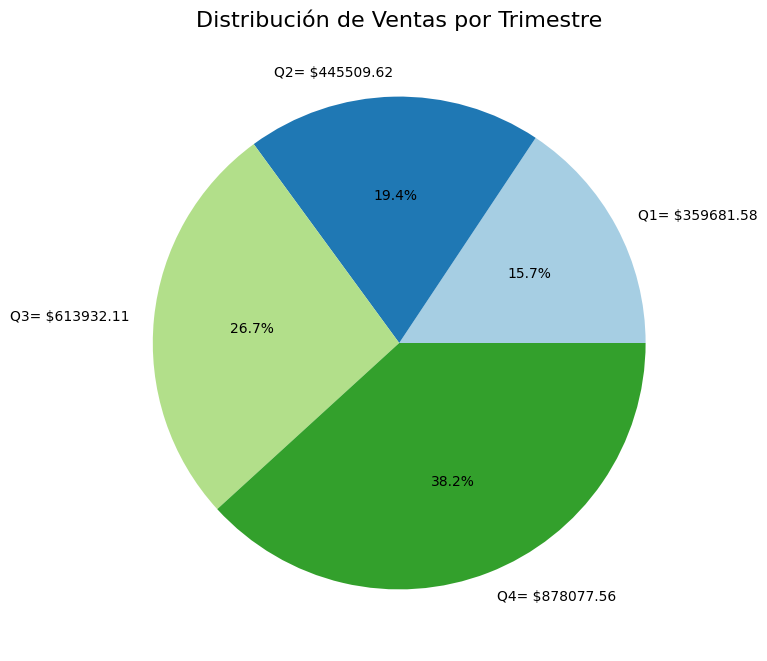

In [61]:
# Crear el diagrama de pie
plt.figure(figsize=(8, 8))

# Crear etiquetas personalizadas con valor y porcentaje
etiquetas = [f'Q{row["Trimestre"]:.0f}= ${row["Sales"]:.2f}' for _, row in ventas_por_trimestre.iterrows()]

plt.pie(ventas_por_trimestre['Sales'], labels=etiquetas, autopct='%1.1f%%', colors=plt.cm.Paired(range(4)))
plt.title('Distribución de Ventas por Trimestre', fontsize=16)
plt.show()